In [8]:
import pandas as pd

In [9]:
input_df = pd.read_csv("pizza_customers.csv")
input_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
input_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
features = ['Male', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
dummies = pd.get_dummies(input_df['Gender'], drop_first= True)
features_df = pd.concat([input_df, dummies], axis=1)
features_df[features]

,Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
def k_means(df):
    kmeans_kwargs = {
         "init": "k-means++",
         "n_init": 10,
         "max_iter": 100,
         "random_state": 42,
     }
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []
    sse = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        score = silhouette_score(df, kmeans.labels_)
        silhouette_coefficients.append(score)
    return (kmeans, sse, silhouette_coefficients)

In [9]:

pizza_customers_cluster = k_means(features_df[features])

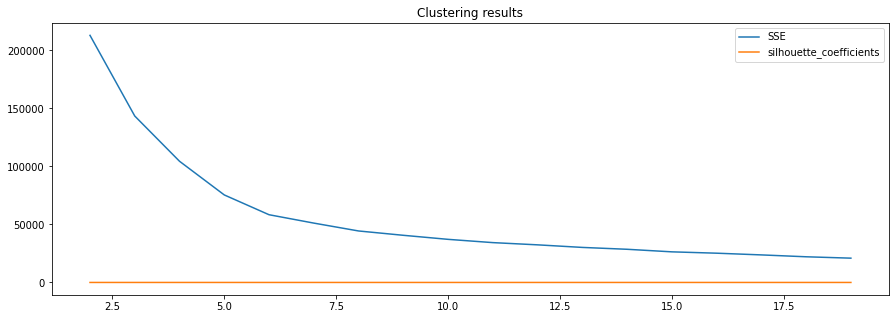

In [10]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 1, figsize=(15,5))
axes.plot(range(2, 20), pizza_customers_cluster[1], label = "SSE")
axes.plot(range(2, 20), pizza_customers_cluster[2], label = "silhouette_coefficients")
axes.set_title("Clustering results")
axes.legend()

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(features_df[features])
clustered_df = input_df
clustered_df['cluster'] = kmeans.labels_

In [14]:
clustered_df.to_csv("./cluster_results.csv")

### Cluster analysis

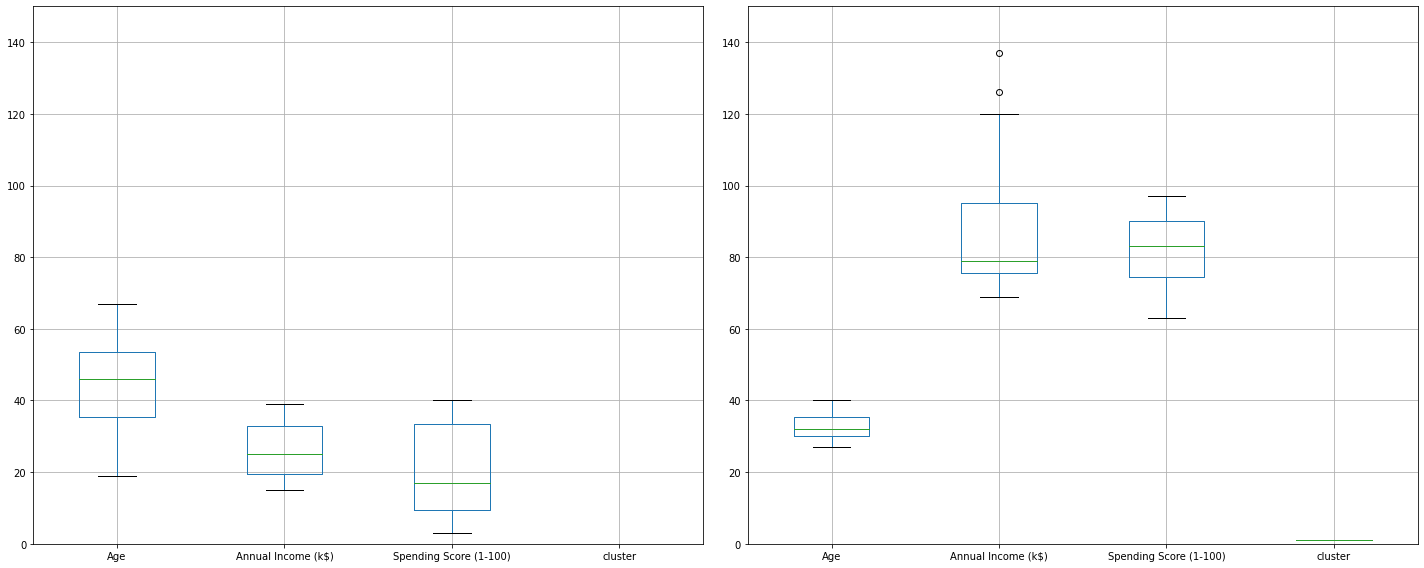

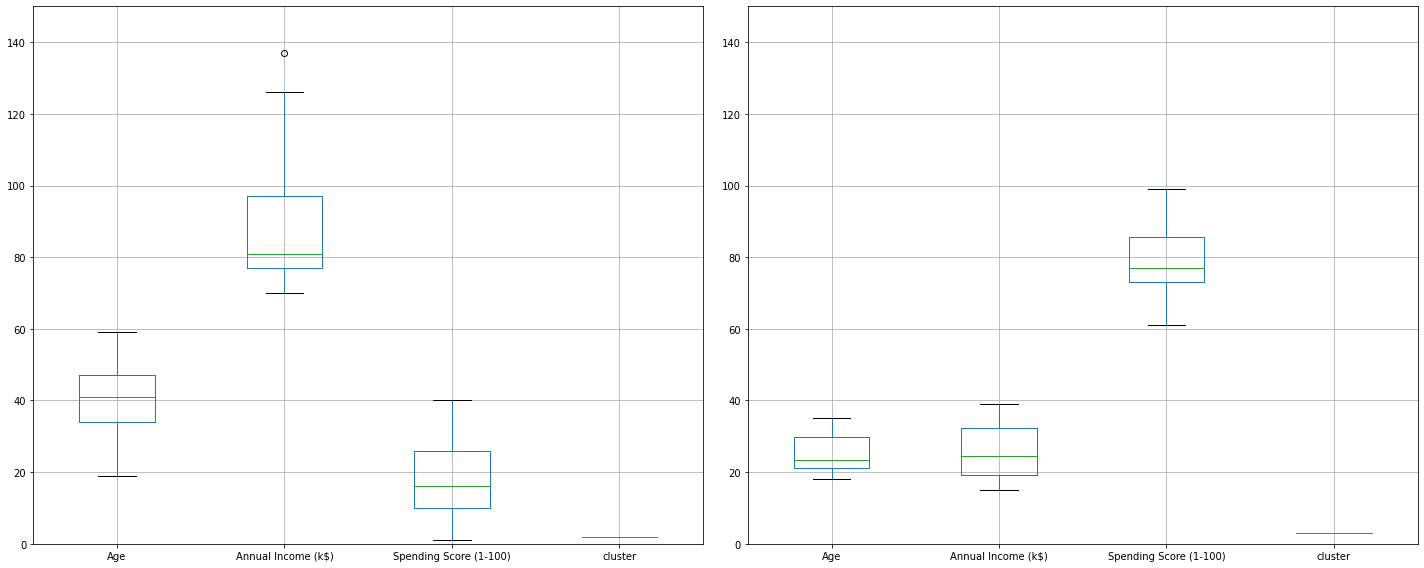

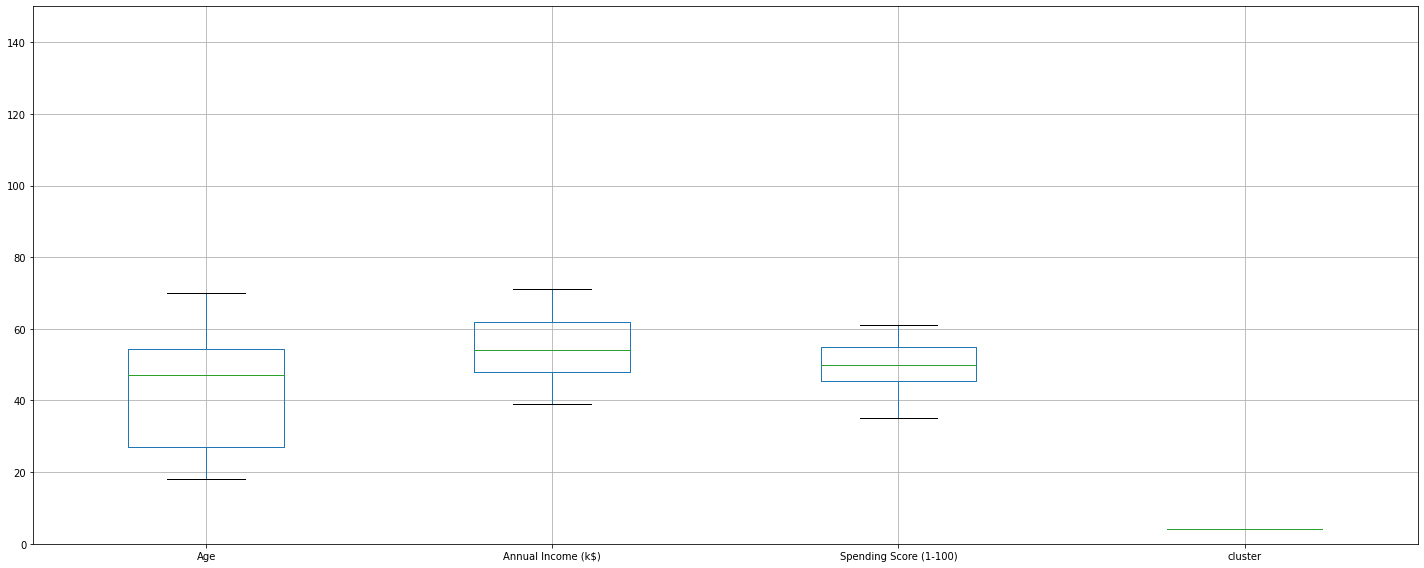

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns



figure, axes = plt.subplots(1, 2, figsize=(20,8), subplot_kw={'ylim': (0,150)})

figure.tight_layout()

#clustered_df.drop("CustomerID", axis=1, inplace=True)
clustered_df[clustered_df['cluster'] == 0].boxplot(ax=axes[0])
clustered_df[clustered_df['cluster'] == 1].boxplot(ax=axes[1])

figure, axes = plt.subplots(1, 2, figsize=(20,8), subplot_kw={'ylim': (0,150)})
figure.tight_layout()
clustered_df[clustered_df['cluster'] == 2].boxplot(ax=axes[0])
clustered_df[clustered_df['cluster'] == 3].boxplot(ax=axes[1])

figure, axes = plt.subplots(1, 1, figsize=(20,8), subplot_kw={'ylim': (0,150)})
figure.tight_layout()

clustered_df[clustered_df['cluster'] == 4].boxplot(ax=axes)

plt.show()

* Cluster 1 -- Low income, low spend score, age range is 45 - 60 -- conservative family
* Cluster 2 -- High income, high spend, age range is 25 to 40 -- High spend niche customers
* Cluster 3 -- High income, Low spend, age 30 to 45 --- Economical family customers
* Cluster 4 -- Low income, high spend, age range 20 to 30 -- Fresher/ student
* Cluster 5 -- Medium income, medium spend, age range 25 to 50 -- Economical family